# More Classes of Profiles

In [1]:
from fractions import Fraction
from matplotlib import pyplot as plt
import poisson_approval as pa

Up to now, we have always used the class of profiles *ProfileNoisyDiscrete*. The package provides other kinds of profiles.

## ProfileHistogram

*ProfileHistogram* is probably the closest class to *ProfileNoisyDiscrete*, because both are:

* *Cardinal*: the voters have explicit utilities (unlike *ProfileOrdinal*, cf. below).
* *Continuous*: there is no concentration of voters on a specific utility (unlike *ProfileDiscrete*, cf. below).

A *ProfileHistogram* can be defined manually (cf. the *Reference* section), but it is more common to use a random factory:

In [2]:
rand_profile = pa.RandProfileHistogramGridUniform(
    denominator=100,
    denominator_bins=100,
    n_bins=10
)
profile = rand_profile()
profile

<abc: 3/25 [Fraction(43, 100) 0 Fraction(1, 10) Fraction(1, 25) Fraction(1, 50)
 Fraction(1, 10) Fraction(2, 25) 0 Fraction(1, 25) Fraction(19, 100)], acb: 19/50 [Fraction(3, 50) Fraction(3, 100) Fraction(7, 100) Fraction(1, 25)
 Fraction(9, 100) Fraction(2, 25) Fraction(2, 25) Fraction(1, 25)
 Fraction(12, 25) Fraction(3, 100)], bca: 3/20 [Fraction(1, 20) Fraction(1, 20) Fraction(29, 100) Fraction(17, 100)
 Fraction(3, 100) Fraction(1, 10) Fraction(1, 50) Fraction(2, 25)
 Fraction(1, 100) Fraction(1, 5)], cab: 7/100 [Fraction(1, 50) Fraction(33, 100) Fraction(13, 100) Fraction(1, 25) 0
 Fraction(17, 100) Fraction(13, 100) Fraction(3, 100) Fraction(1, 20)
 Fraction(1, 10)], cba: 7/25 [Fraction(11, 100) Fraction(3, 50) Fraction(21, 50) Fraction(3, 100)
 Fraction(9, 50) 0 Fraction(1, 10) 0 0 Fraction(1, 10)]> (Condorcet winner: a, c)

In this example, the share of voters $abc$ is:

In [3]:
profile.abc

Fraction(3, 25)

The distribution of their utility for their middle candidate $b$ is given by a histogram:

In [4]:
profile.d_ranking_histogram['abc']

array([Fraction(43, 100), 0, Fraction(1, 10), Fraction(1, 25),
       Fraction(1, 50), Fraction(1, 10), Fraction(2, 25), 0,
       Fraction(1, 25), Fraction(19, 100)], dtype=object)

The above notation means for example that for a voter $abc$, the probability that her utility for her second candidate $b$ is in the first of the ten bins (i.e. between 0 and 0.1) is:

In [5]:
profile.d_ranking_histogram['abc'][0]

Fraction(43, 100)

Voters in a bin are distributed uniformly. This histogram and the CDF of this distribution can be visualized by:

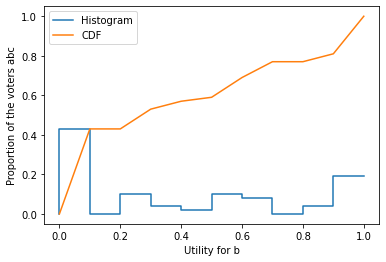

In [6]:
ranking = 'abc'
profile.plot_histogram(ranking, label='Histogram')
profile.plot_cdf(ranking, label='CDF')
plt.ylabel('Proportion of the voters %s' % ranking)
plt.legend()

All other features are defined as usual. For example:

In [7]:
rand_strategy = pa.RandStrategyThresholdGridUniform(denominator_threshold=100, profile=profile)
strategy = rand_strategy()
strategy

<abc: utility-dependent (9/20), acb: utility-dependent (3/50), bca: utility-dependent (3/50), cab: utility-dependent (19/100), cba: utility-dependent (97/100)> ==> c

In [8]:
strategy.is_equilibrium

EquilibriumStatus.NOT_EQUILIBRIUM

## ProfileTwelve

In a *ProfileTwelve*, the voters behave as if their utility for their middle candidate was either infinitely close to 0 or to 1. For example, voters with the ranking $abc$ are split in two categories: voters *a_bc* (whose utility for $b$ is very low) and voters *ab_c* (whose utility for $b$ is very high). This can be interpreted in two ways:

* As a model of their preferences: voters *a_bc* have a utility for $b$ that is very close to 1,
* As a behavioral model: when their best response is utility-dependent, voters *a_bc* always choose to vote $a$ only, no matter the utility threshold of the best response.

Create a profile:

In [9]:
profile = pa.ProfileTwelve({'ab_c': Fraction(1, 10), 'b_ac': Fraction(6, 10),
                            'c_ab': Fraction(2, 10), 'ca_b': Fraction(1, 10)})
profile

<ab_c: 1/10, b_ac: 3/5, c_ab: 1/5, ca_b: 1/10> (Condorcet winner: b)

Share of voters *ab_c*:

In [10]:
profile.ab_c

Fraction(1, 10)

Which types are in the profile?

In [11]:
profile.support_in_types

{ab_c, b_ac, c_ab, ca_b}

Are all possible types in the profile?

In [12]:
profile.is_generic_in_types

False

Is one type shared by a majority of voters?

In [13]:
profile.has_majority_type

True

In addition to the usual *StrategyOrdinal* and *StrategyThreshold*, this kind of profile also accepts a *StrategyTwelve*:

In [14]:
strategy = pa.StrategyTwelve({'abc': 'ab', 'bac': 'b', 'cab': pa.UTILITY_DEPENDENT}, profile=profile)
strategy

<abc: ab, bac: b, cab: utility-dependent> ==> b

In the example above, the strategy for $cab$ is utility-dependent, meaning that voters *c_ba* vote for $c$ and voters *cb_a* vote for $c$ and $b$. One can envision it as a threshold strategy, but it is useless to specify the value of the threshold because we're dealing with a *ProfileTwelve*.

In [15]:
profile.is_equilibrium(strategy)

EquilibriumStatus.EQUILIBRIUM

Since there is a finite number of pure strategies for a *ProfileTwelve*, it is possible to analyze them all:

In [16]:
profile.analyzed_strategies_pure

Equilibria:
<abc: a, bac: b, cab: ac> ==> b (FF)
<abc: a, bac: ab, cab: c> ==> a (D)
<abc: ab, bac: b, cab: utility-dependent> ==> b (FF)

Non-equilibria:
<abc: a, bac: b, cab: c> ==> b (FF)
<abc: a, bac: b, cab: utility-dependent> ==> b (FF)
<abc: a, bac: ab, cab: ac> ==> a (D)
<abc: a, bac: ab, cab: utility-dependent> ==> a (D)
<abc: ab, bac: b, cab: c> ==> b (FF)
<abc: ab, bac: b, cab: ac> ==> b (FF)
<abc: ab, bac: ab, cab: c> ==> a, b (FF)
<abc: ab, bac: ab, cab: ac> ==> a (D)
<abc: ab, bac: ab, cab: utility-dependent> ==> a (D)

All other features are defined as usual.

## ProfileDiscrete

A *ProfileDiscrete* is similar to a *ProfileNoisyDiscrete*, but of course without noise:

In [17]:
profile = pa.ProfileDiscrete({
    ('abc', 0.9): Fraction(1, 10),
    ('bac', 0.2): Fraction(6, 10),
    ('cab', 0.25): Fraction(2, 10),
    ('cab', 0.75): Fraction(1, 10)
})
profile

<abc 0.9: 1/10, bac 0.2: 3/5, cab 0.25: 1/5, cab 0.75: 1/10> (Condorcet winner: b)

In the above example, the share of voters with ranking $abc$ and a utility 0.9 for their middle candidate $b$ is 1/10, the share of voters with ranking $bac$ and a utility 0.2 for their middle candidate $a$ is 3/5, etc.

The difficulty is that there is now a concentration of voters, for example, on $(abc, 0.9)$. This opens the door to mixed strategies where voters of this type split their ballots between $a$ and $ab$. To account for this fact, a *StrategyThreshold* can include ratios of *optimistic voters*:

In [18]:
strategy = pa.StrategyThreshold({
    'abc': (0.9, 0.7),
    'bac': 0.5,
    'cab': 0.5
}, profile=profile)
strategy

<abc: utility-dependent (0.9, 0.7), bac: utility-dependent (0.5), cab: utility-dependent (0.5)> ==> b

The above notation means that voters $abc$ have:

* A utility threshold of 0.9: they vote for $a$ (resp. $ab$) if their utility for their second candidate $b$ is lower (resp. greater) than 0.9;
* An ratio of optimistic voters of 0.7: voters whose utility for $b$ is equal to the utility threshold 0.9 are split, with 0.7 of them voting for $a$ and the rest voting for $ab$.

Like for *ProfileTwelve*, there is a finite number of pure strategies, so it is possible to analyze them all:

In [19]:
profile.analyzed_strategies_pure

Equilibria:
<abc: ab, bac: b, cab: utility-dependent (0.5)> ==> b (FF)
<abc: a, bac: ab, cab: c> ==> a (D)
<abc: a, bac: b, cab: ac> ==> b (FF)

Non-equilibria:
<abc: ab, bac: ab, cab: ac> ==> a (D)
<abc: ab, bac: ab, cab: utility-dependent (0.5)> ==> a (D)
<abc: ab, bac: ab, cab: c> ==> a, b (FF)
<abc: ab, bac: b, cab: ac> ==> b (FF)
<abc: ab, bac: b, cab: c> ==> b (FF)
<abc: a, bac: ab, cab: ac> ==> a (D)
<abc: a, bac: ab, cab: utility-dependent (0.5)> ==> a (D)
<abc: a, bac: b, cab: utility-dependent (0.5)> ==> b (FF)
<abc: a, bac: b, cab: c> ==> b (FF)

All other features are defined as usual.

## ProfileOrdinal

A *ProfileOrdinal* is a bit special, in the sense that it does not represent a profile, strictly speaking, but rather a family of profiles that have the same ordinal representation.

### Definition and Strategic Analysis

In [20]:
profile = pa.ProfileOrdinal({
    'abc': Fraction(1, 10), 
    'bac': Fraction(6, 10), 
    'cab': Fraction(3, 10)
})
profile

<abc: 1/10, bac: 3/5, cab: 3/10> (Condorcet winner: b)

Let us analyze its ordinal strategies:

In [21]:
profile.analyzed_strategies_ordinal

Equilibria:
<abc: a, bac: b, cab: ac> ==> b (FF)
<abc: a, bac: ab, cab: c> ==> a (D)

Utility-dependent equilibrium:
<abc: ab, bac: b, cab: c> ==> b (FF)

Non-equilibria:
<abc: a, bac: b, cab: c> ==> b (FF)
<abc: a, bac: ab, cab: ac> ==> a (D)
<abc: ab, bac: b, cab: ac> ==> b (FF)
<abc: ab, bac: ab, cab: c> ==> a, b (FF)
<abc: ab, bac: ab, cab: ac> ==> a (D)

In the example above, there are not only equilibria and non-equilibria but also a new category of strategies: utility-dependent equilibria. For example:

In [22]:
strategy = profile.analyzed_strategies_ordinal.utility_dependent[0]
strategy

<abc: ab, bac: b, cab: c> ==> b

In [23]:
strategy.d_ranking_best_response['abc']

<ballot = ab, utility_threshold = 0, justification = Asymptotic method>

In [24]:
strategy.d_ranking_best_response['bac']

<ballot = utility-dependent, utility_threshold = 0.836014, justification = Asymptotic method>

In [25]:
strategy.d_ranking_best_response['cab']

<ballot = utility-dependent, utility_threshold = 0.163986, justification = Asymptotic method>

What happens here? For example, the best response for voters $bac$ is utility-dependent, with a utility threshold of 0.84 approximately. The fact that they vote $b$ in *strategy* is indeed a best response if and only if their utility for their second candidate $a$ is lower than this value. Overall, *strategy* is an equilibrium if and only if:

* The utility of voters $bac$ for $a$ is lower than 0.84,
* And the utility of voters $cab$ for $a$ is lower than 0.16.

### Probability computations

The following functions compute probabilities. They are based on the assumption that voters $abc$ have the **same** utility for their second candidate $b$ and that it is drawn uniformly in [0, 1]. And similarly for voters $acb$, $bac$, etc.

Probability that there exists an equilibrium:

In [26]:
profile.proba_equilibrium()

1

In this example, the probability is 1 because there exists some equilibria that do not depend on the utilities.

Probability that there exists an equilibrium where voters $abc$ cast a ballot $ab$:

In [27]:
def test_abc_vote_ab(strategy):
    return strategy.abc == 'ab'
profile.proba_equilibrium(test=test_abc_vote_ab)

0.13709468816628012

Probability that there exists an equilibrium where candidate $c$ wins:

In [28]:
def test_c_wins(strategy):
    return 'c' in strategy.winners
profile.proba_equilibrium(test=test_c_wins)

0

Distribution of the number of equilibria:

In [29]:
profile.distribution_equilibria()

array([0.        , 0.        , 0.86290531, 0.13709469])

The above array means that it is impossible that there is 0 or 1 equilibrium, a probability 0.86 to have 2 equilibria, and a probability 0.14 to have 3 equilibria.

You can access the distribution of equilibria, conditionally on a given test:

In [30]:
profile.distribution_equilibria(test=test_abc_vote_ab)

array([0.86290531, 0.13709469])

The above array means that there is a probability 0.86 to have no equilibrium, and a probability 0.14 to have one equilibrium (conditionally on the given test).

Distribution of the number of winners at equilibrium:

In [31]:
profile.distribution_winners()

array([0, 0, 1, 0])

The array above means that there are always 2 candidates (namely $a$ and $b$) who can win at equilibrium.

You can access the distribution of winners, conditionally on a given test:

In [32]:
profile.distribution_winners(test=test_abc_vote_ab)

array([0.86290531, 0.13709469, 0.        , 0.        ])

The above array means that there is a probability 0.86 of having 0 winner (i.e. when there is no equilibrium), and a probability 0.14 to have 1 winner (conditionally on the given test).